In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt

In [2]:
data_dir = "./waveform-inversion/train_samples" 

In [3]:
for root, dirs, files in os.walk(data_dir):
    # ルートディレクトリ名をインデント付きで表示
    depth = root.replace(data_dir, "").count(os.sep)
    indent = "  " * depth
    print(f"{indent}{os.path.basename(root) or data_dir}:")
    # すべての .npy ファイルを表示
    for f in files:
        if f.endswith(".npy"):
            print(f"{indent}  └ {f}")

train_samples:
  CurveFault_A:
    └ seis2_1_0.npy
    └ seis4_1_0.npy
    └ vel2_1_0.npy
    └ vel4_1_0.npy
  CurveFault_B:
    └ seis6_1_0.npy
    └ seis8_1_0.npy
    └ vel6_1_0.npy
    └ vel8_1_0.npy
  CurveVel_A:
    data:
      └ data1.npy
      └ data2.npy
    model:
      └ model1.npy
      └ model2.npy
  CurveVel_B:
    data:
      └ data1.npy
      └ data2.npy
    model:
      └ model1.npy
      └ model2.npy
  FlatFault_A:
    └ seis2_1_0.npy
    └ seis4_1_0.npy
    └ vel2_1_0.npy
    └ vel4_1_0.npy
  FlatFault_B:
    └ seis6_1_0.npy
    └ seis8_1_0.npy
    └ vel6_1_0.npy
    └ vel8_1_0.npy
  FlatVel_A:
    data:
      └ data1.npy
      └ data2.npy
    model:
      └ model1.npy
      └ model2.npy
  FlatVel_B:
    data:
      └ data1.npy
      └ data2.npy
    model:
      └ model1.npy
      └ model2.npy
  Style_A:
    data:
      └ data1.npy
      └ data2.npy
    model:
      └ model1.npy
      └ model2.npy
  Style_B:
    data:
      └ data1.npy
      └ data2.npy
    model:
   

In [4]:
import os
import numpy as np

base_dir = "./waveform-inversion/train_samples"
output_base = "./merged_samples"
os.makedirs(output_base, exist_ok=True)

from collections import defaultdict

# A/Bペアを集める
folders = os.listdir(base_dir)
base_pairs = defaultdict(dict)
for f in folders:
    if f.endswith("_A"):
        base_name = f[:-2]
        base_pairs[base_name]['A'] = f
    elif f.endswith("_B"):
        base_name = f[:-2]
        base_pairs[base_name]['B'] = f

def collect_and_load_files(folder_path):
    wave_arrays = []
    vel_arrays = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".npy"):
                path = os.path.join(root, file)
                fname = file.lower()
                arr = np.load(path)
                if "seis" in fname or "data" in fname:
                    wave_arrays.append(arr)
                elif "vel" in fname or "model" in fname:
                    vel_arrays.append(arr)
    return wave_arrays, vel_arrays

for base_name, ab_dict in base_pairs.items():
    wave_all = []
    vel_all = []

    # Aフォルダ
    if 'A' in ab_dict:
        path_a = os.path.join(base_dir, ab_dict['A'])
        wa, va = collect_and_load_files(path_a)
        wave_all.extend(wa)
        vel_all.extend(va)

    # Bフォルダ
    if 'B' in ab_dict:
        path_b = os.path.join(base_dir, ab_dict['B'])
        wb, vb = collect_and_load_files(path_b)
        wave_all.extend(wb)
        vel_all.extend(vb)

    # 配列を縦方向に結合
    if len(wave_all) > 0:
        wave_merged = np.concatenate(wave_all, axis=0)
    else:
        wave_merged = np.array([])

    if len(vel_all) > 0:
        vel_merged = np.concatenate(vel_all, axis=0)
    else:
        vel_merged = np.array([])

    # 保存用フォルダ作成
    save_dir = os.path.join(output_base, base_name)
    os.makedirs(save_dir, exist_ok=True)

    # 保存
    if wave_merged.size > 0:
        np.save(os.path.join(save_dir, "wave.npy"), wave_merged)
    if vel_merged.size > 0:
        np.save(os.path.join(save_dir, "vel.npy"), vel_merged)

    print(f"{base_name} 完了: wave.npy と vel.npy を保存しました。")


CurveFault 完了: wave.npy と vel.npy を保存しました。
CurveVel 完了: wave.npy と vel.npy を保存しました。
FlatFault 完了: wave.npy と vel.npy を保存しました。
FlatVel 完了: wave.npy と vel.npy を保存しました。
Style 完了: wave.npy と vel.npy を保存しました。


In [5]:
import numpy as np
import os

base_dir = "./merged_samples"
target_folders = ["CurveFault", "CurveVel", "FlatFault", "FlatVel", "Style"]

for folder in target_folders:
    folder_path = os.path.join(base_dir, folder)
    wave_path = os.path.join(folder_path, "wave.npy")
    vel_path = os.path.join(folder_path, "vel.npy")

    if not (os.path.exists(wave_path) and os.path.exists(vel_path)):
        print(f"{folder} フォルダに wave.npy または vel.npy がありません。スキップします。")
        continue

    wave = np.load(wave_path)
    vel = np.load(vel_path)

    if wave.shape[0] != vel.shape[0]:
        print(f"{folder} の wave と vel の行数が一致しません。スキップします。")
        continue

    indices = np.arange(0, wave.shape[0], 5)
    wave_sampled = wave[indices]
    vel_sampled = vel[indices]

    wave_out_path = os.path.join(folder_path, "wave_sampled.npy")
    vel_out_path = os.path.join(folder_path, "vel_sampled.npy")

    np.save(wave_out_path, wave_sampled)
    np.save(vel_out_path, vel_sampled)

    print(f"{folder} の5の倍数行を抽出し保存しました。元: {wave.shape[0]} 行 → 抽出後: {wave_sampled.shape[0]} 行")


CurveFault の5の倍数行を抽出し保存しました。元: 2000 行 → 抽出後: 400 行
CurveVel の5の倍数行を抽出し保存しました。元: 2000 行 → 抽出後: 400 行
FlatFault の5の倍数行を抽出し保存しました。元: 2000 行 → 抽出後: 400 行
FlatVel の5の倍数行を抽出し保存しました。元: 2000 行 → 抽出後: 400 行
Style の5の倍数行を抽出し保存しました。元: 2000 行 → 抽出後: 400 行


In [6]:
import numpy as np
import os

base_dir = "./merged_samples"
target_folders = ["CurveFault", "CurveVel", "FlatFault", "FlatVel", "Style"]

wave_list = []
vel_list = []

for folder in target_folders:
    folder_path = os.path.join(base_dir, folder)
    wave_path = os.path.join(folder_path, "wave.npy")
    vel_path = os.path.join(folder_path, "vel.npy")

    if not (os.path.exists(wave_path) and os.path.exists(vel_path)):
        print(f"{folder} フォルダに wave.npy または vel.npy がありません。スキップします。")
        continue

    wave = np.load(wave_path)
    vel = np.load(vel_path)

    if wave.shape[0] != vel.shape[0]:
        print(f"{folder} の wave と vel の行数が一致しません。スキップします。")
        continue

    indices = np.arange(0, wave.shape[0], 5)
    wave_sampled = wave[indices]
    vel_sampled = vel[indices]

    wave_list.append(wave_sampled)
    vel_list.append(vel_sampled)

# 縦方向にすべて結合
if len(wave_list) > 0:
    merged_wave = np.concatenate(wave_list, axis=0)
else:
    merged_wave = np.array([])

if len(vel_list) > 0:
    merged_vel = np.concatenate(vel_list, axis=0)
else:
    merged_vel = np.array([])

# 保存先ディレクトリ
output_dir = "./dataset"
os.makedirs(output_dir, exist_ok=True)

wave_out_path = os.path.join(output_dir, "wave.npy")
vel_out_path = os.path.join(output_dir, "vel.npy")

np.save(wave_out_path, merged_wave)
np.save(vel_out_path, merged_vel)

print(f"全フォルダの5の倍数行を統合して保存しました。")
print(f"wave: {merged_wave.shape[0]} 行, vel: {merged_vel.shape[0]} 行")


全フォルダの5の倍数行を統合して保存しました。
wave: 2000 行, vel: 2000 行


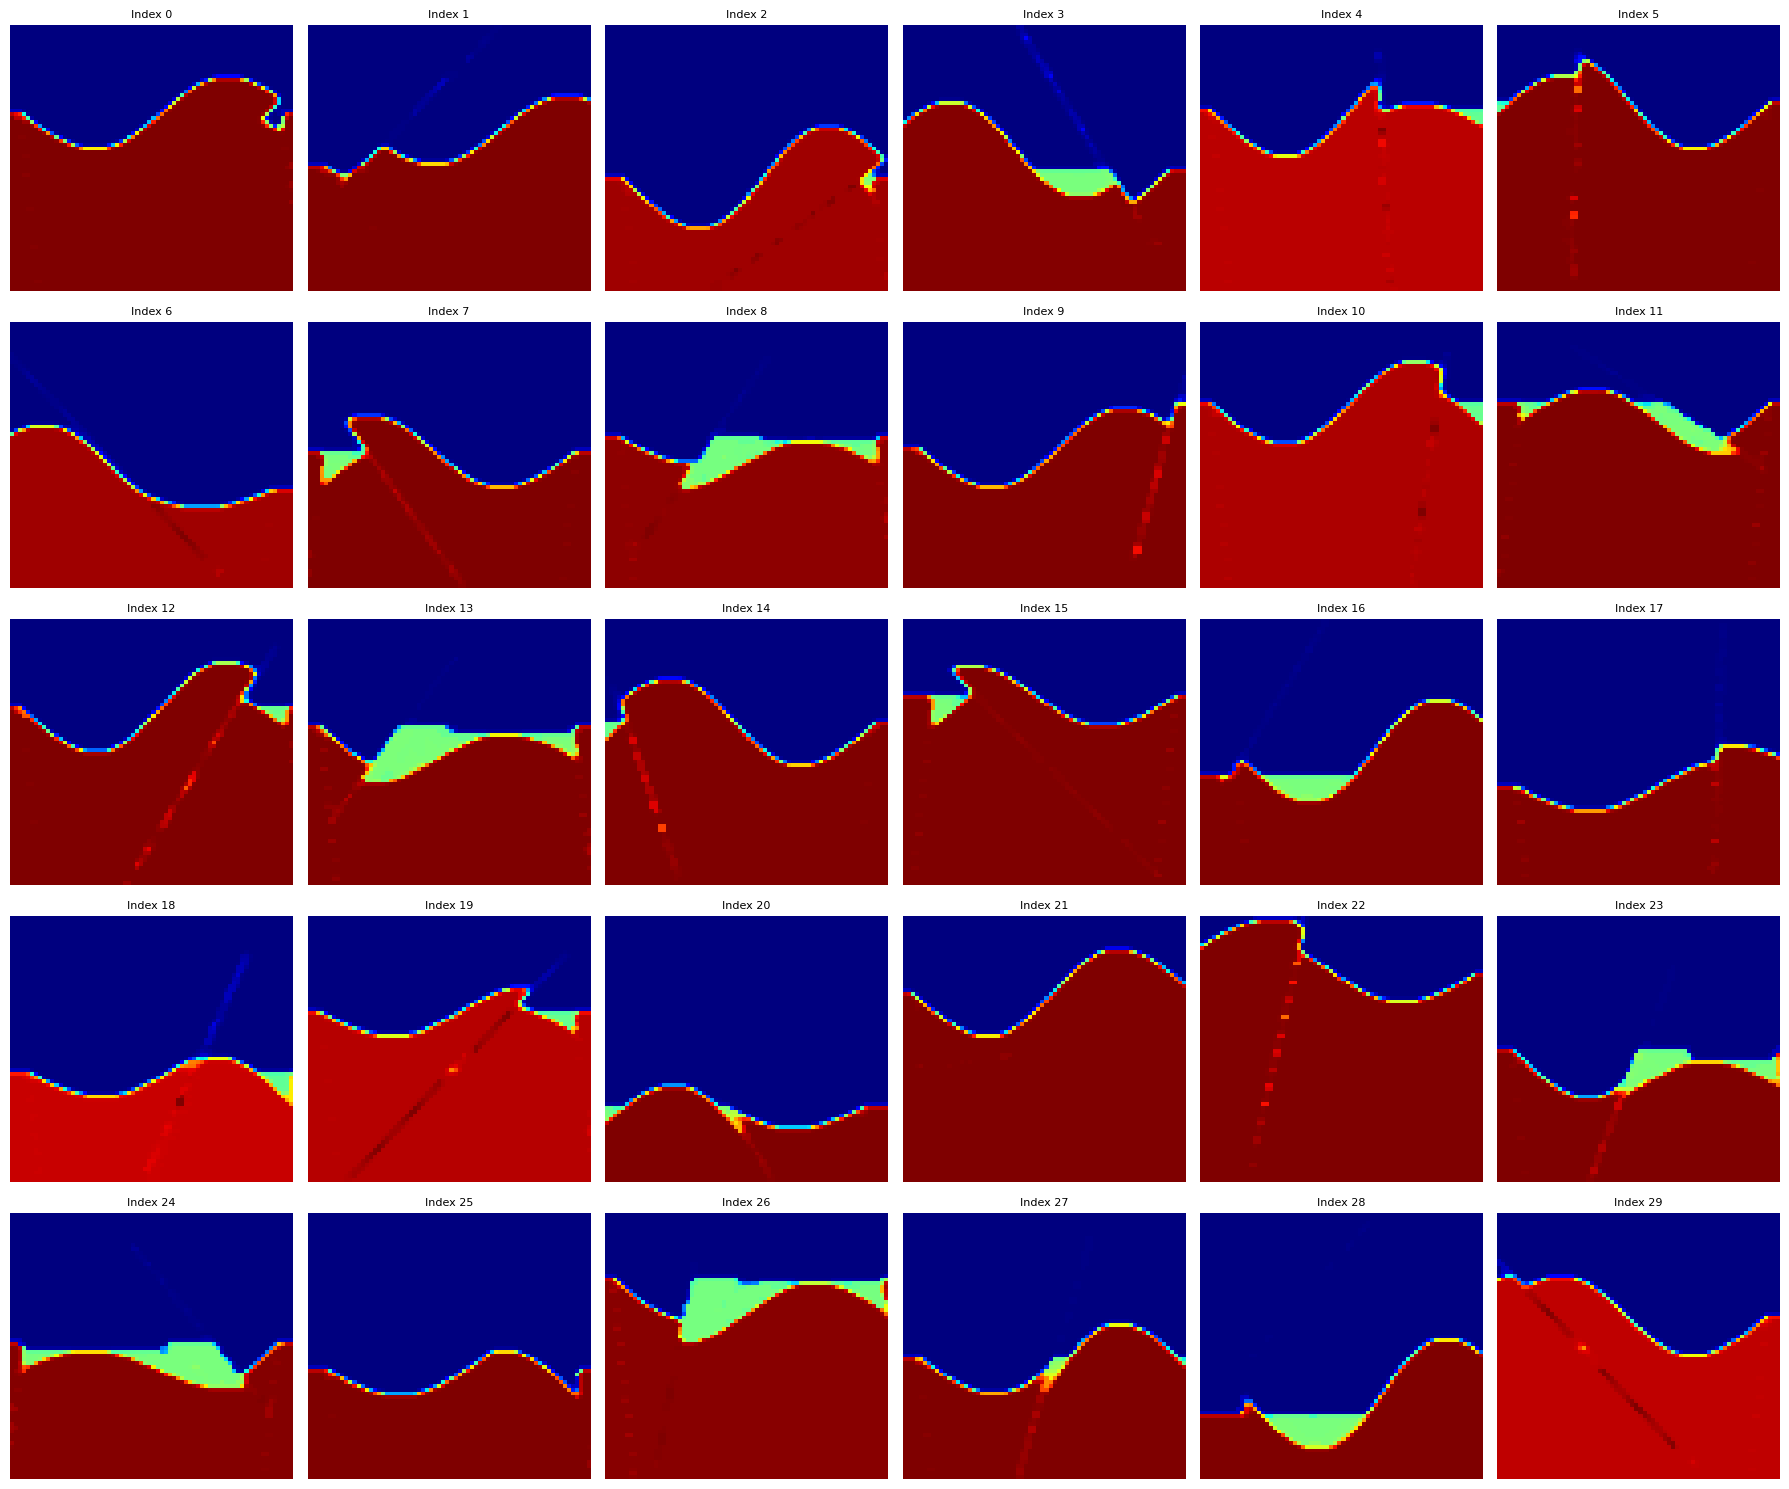

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ファイルパス
vel_path = "./dataset/vel.npy"

# npy読み込み
vel = np.load(vel_path)  # 例: (N, C, H, W) または (N, H, W) などの形状

# 表示したい枚数
n = 30
cols = 6
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
axes = axes.flatten()

for i in range(n):
    ax = axes[i]
    # チャネル数があればチャネル0を表示
    if vel.ndim == 4:
        # (N, C, H, W) の場合
        img = vel[i, 0]
    elif vel.ndim == 3:
        # (N, H, W) の場合
        img = vel[i]
    else:
        raise ValueError(f"予期しないデータ形状: {vel.shape}")

    ax.imshow(img, cmap='jet', aspect='auto')
    ax.set_title(f"Index {i}", fontsize=8)
    ax.axis('off')

# 余ったサブプロットは非表示
for j in range(n, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


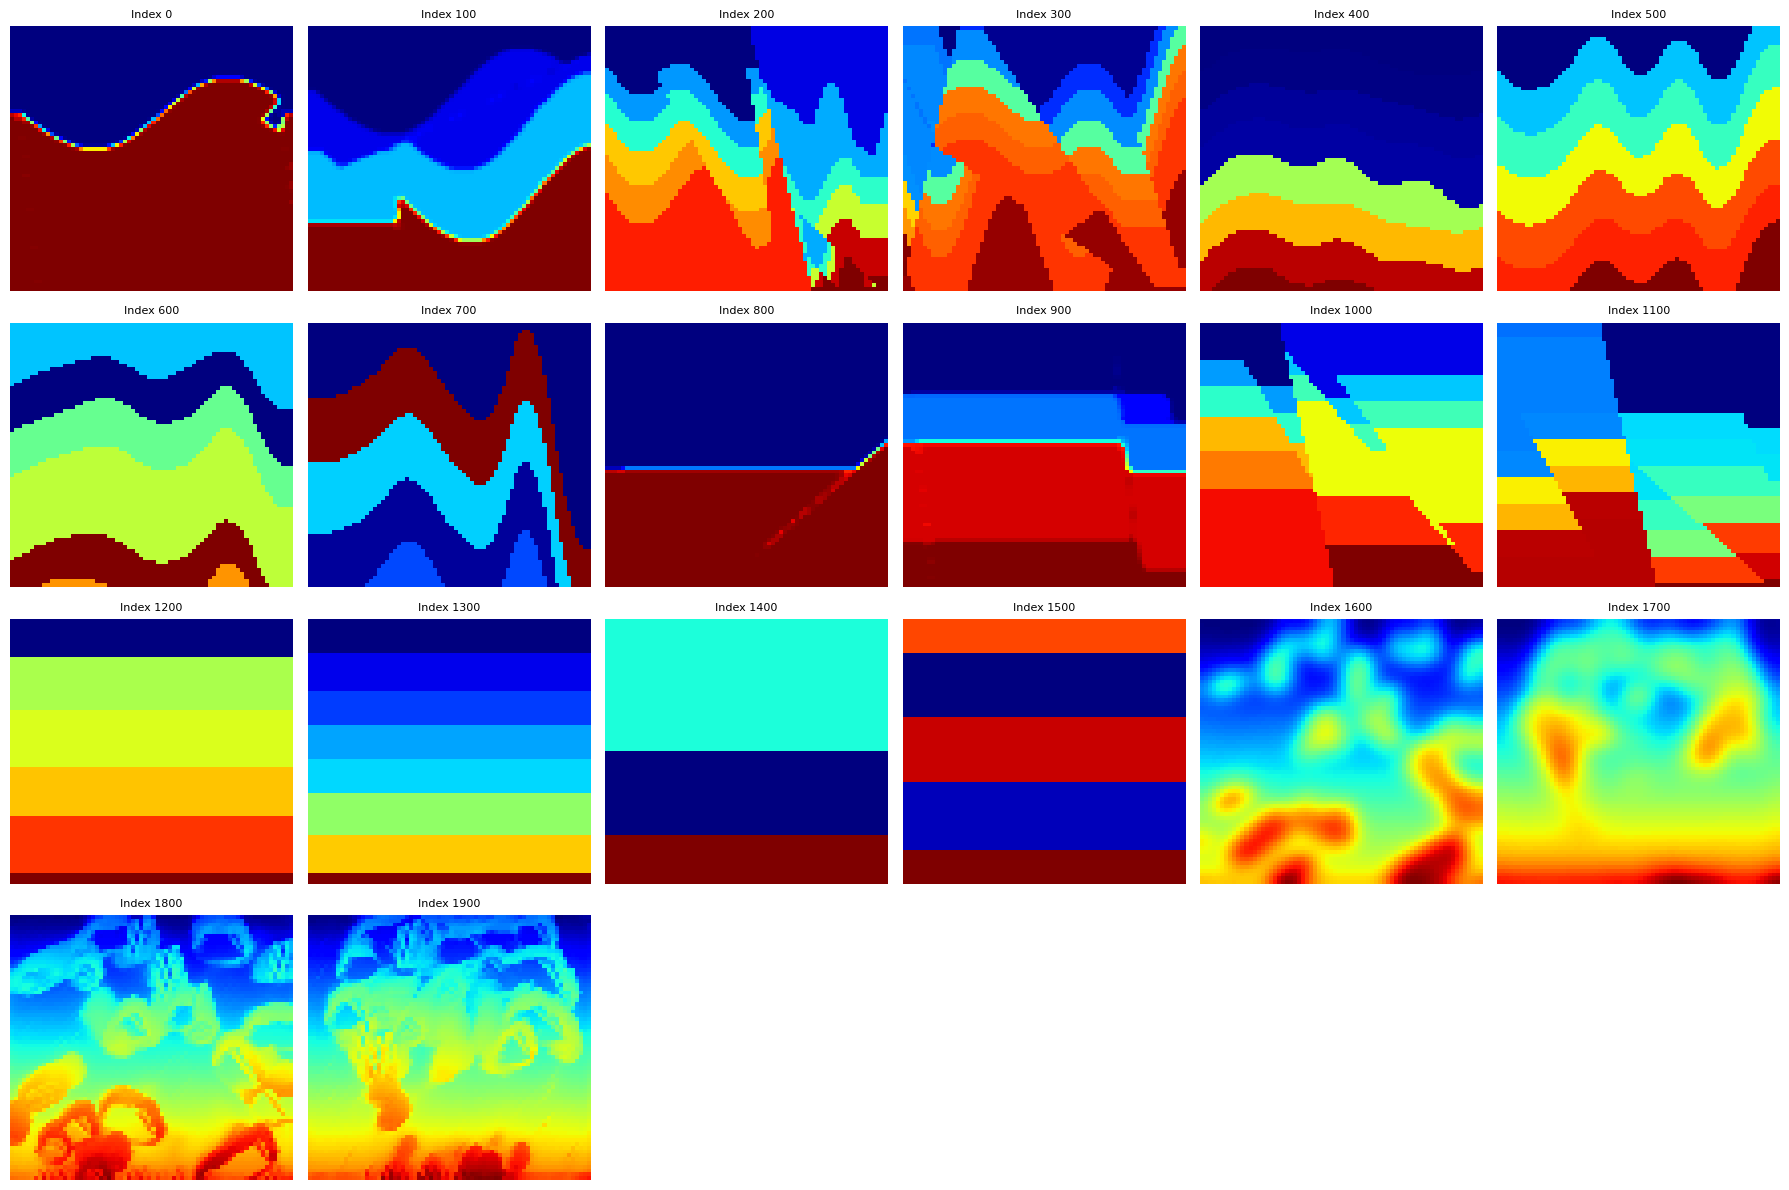

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

vel_path = "./dataset/vel.npy"
vel = np.load(vel_path)

# 表示したい枚数
n = 20
cols = 6
rows = (n + cols - 1) // cols

# 100の倍数のインデックスを取得
indices = np.arange(0, vel.shape[0], 100)[:n]  # 最大 n 枚分だけ

fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
axes = axes.flatten()

for i, idx in enumerate(indices):
    ax = axes[i]
    if vel.ndim == 4:
        img = vel[idx, 0]
    elif vel.ndim == 3:
        img = vel[idx]
    else:
        raise ValueError(f"予期しないデータ形状: {vel.shape}")

    ax.imshow(img, cmap='jet', aspect='auto')
    ax.set_title(f"Index {idx}", fontsize=8)
    ax.axis('off')

for j in range(len(indices), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [10]:
import torch
from torch.utils.data import Dataset, DataLoader

class WaveformDataset(Dataset):
    def __init__(self, waves_path, vels_path):
        self.waves = np.load(waves_path)  # shape (N, 5,1000,70)
        self.vels  = np.load(vels_path)   # shape (N, 1,70,70)
    def __len__(self):
        return len(self.waves)
    def __getitem__(self, idx):
        x = torch.from_numpy(self.waves[idx]).float()
        y = torch.from_numpy(self.vels[idx]).float()
        return x, y

# 例: 1つ目のバッチを読み込む
ds = WaveformDataset("dataset/wave.npy",
                     "dataset/vel.npy")
loader = DataLoader(ds, batch_size=32, shuffle=True)

for xb, yb in loader:
    print(xb.shape, yb.shape)  # torch.Size([32,5,1000,70]), torch.Size([32,1,70,70])
    break

torch.Size([32, 5, 1000, 70]) torch.Size([32, 1, 70, 70])
